In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/data/notebook_files/Subscription Cohort Analysis Data.csv')
df.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
0,154536156,2022-09-01,NaN,39,month,Yes
1,149713408,2022-09-01,2022-09-02,39,month,No
2,153756284,2022-09-01,2022-09-02,39,month,No
3,121253113,2022-09-01,2022-09-23,39,month,Yes
4,154467210,2022-09-01,2023-06-29,39,month,Yes


## Data Cleaning

In [3]:
#as we can see, we have a maximum of 3069 data entries => here, we can see that the column "canceled_date" contains NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            3069 non-null   int64 
 1   created_date           3069 non-null   object
 2   canceled_date          2004 non-null   object
 3   subscription_cost      3069 non-null   int64 
 4   subscription_interval  3069 non-null   object
 5   was_subscription_paid  3069 non-null   object
dtypes: int64(2), object(4)
memory usage: 144.0+ KB


In [4]:
print((df.isnull().sum()/len(df))*100)
print('\n')
print('\n')
print(df.isnull().sum())
#as we can see we have we have only one column with null-values => 34.70%; affected rows

customer_id               0.000000
created_date              0.000000
canceled_date            34.701857
subscription_cost         0.000000
subscription_interval     0.000000
was_subscription_paid     0.000000
dtype: float64




customer_id                 0
created_date                0
canceled_date            1065
subscription_cost           0
subscription_interval       0
was_subscription_paid       0
dtype: int64


In [5]:
df[df['canceled_date'].isna()].head()
#we will need the NaN values for the survival analysis, we will tackle that problem in the feature enginee

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
0,154536156,2022-09-01,NaN,39,month,Yes
12,152925600,2022-09-02,NaN,39,month,Yes
18,154131290,2022-09-03,NaN,39,month,Yes
19,154434009,2022-09-03,NaN,39,month,Yes
37,154225450,2022-09-05,NaN,39,month,Yes


## Feature Engineering

In [6]:
df['canceled_date']=df['canceled_date'].fillna(df['created_date'])
#the NaN values get replaced with the date of the subscription begin=> so we will get a zero when we create the column
##which indicates that the subscription has not been cancelled yet
df['created_date']=pd.to_datetime(df['created_date'])
df['canceled_date']=pd.to_datetime(df['canceled_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            3069 non-null   int64         
 1   created_date           3069 non-null   datetime64[ns]
 2   canceled_date          3069 non-null   datetime64[ns]
 3   subscription_cost      3069 non-null   int64         
 4   subscription_interval  3069 non-null   object        
 5   was_subscription_paid  3069 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 144.0+ KB


In [7]:
df['days_passed_since_cancellation']=(df['canceled_date']-df['created_date']).dt.days
#1=> is cancelled; 0=> is active
df['subscription_status']=np.where(df['days_passed_since_cancellation'] > 0,1,0)
df.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,days_passed_since_cancellation,subscription_status
0,154536156,2022-09-01,2022-09-01,39,month,Yes,0,0
1,149713408,2022-09-01,2022-09-02,39,month,No,1,1
2,153756284,2022-09-01,2022-09-02,39,month,No,1,1
3,121253113,2022-09-01,2022-09-23,39,month,Yes,22,1
4,154467210,2022-09-01,2023-06-29,39,month,Yes,301,1


## Exploratory Analysis

In [8]:
plt.figure(figsize=(8,6))
df.groupby('subscription_status')['customer_id'].count().plot(kind='bar', color=['green','red'])
plt.title('Breakdown of Subscription Status',size=12,fontweight='bold')
plt.text(df['subscription_status'].unique()[0],df.groupby('subscription_status')['customer_id'].count(),
         '{}'.format(df.groupby('subscription_status')['customer_id'].count()))
plt.xticks(rotation=0)
plt.xlabel('subscription_status',size=12,fontweight='bold')
plt.show()

<Figure size 576x432 with 1 Axes>

Text(0.5, 0, 'subscription_status')

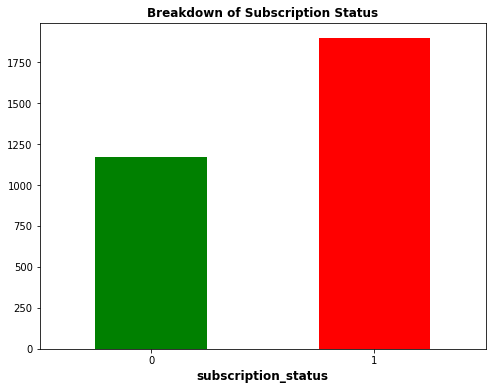

In [9]:
plt.figure(figsize=(8,6))
df.groupby('subscription_status')['customer_id'].count().plot(kind='bar', color=['green','red'])
plt.title('Breakdown of Subscription Status',size=12,fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('subscription_status',size=12,fontweight='bold')
#the data set contains more former customers (cancelled) than active customers

In [10]:
print('Different subscription types: {}'.format(df['subscription_interval'].unique()[0]))
print('Different cost options: {}'.format(df['subscription_cost'].unique()[0]))
#as we can see we do have only one price available for the subscriptions


Different subscription types: month
Different cost options: 39


Text(0.5, 1.0, 'Development of Active/Cancelled Customers')

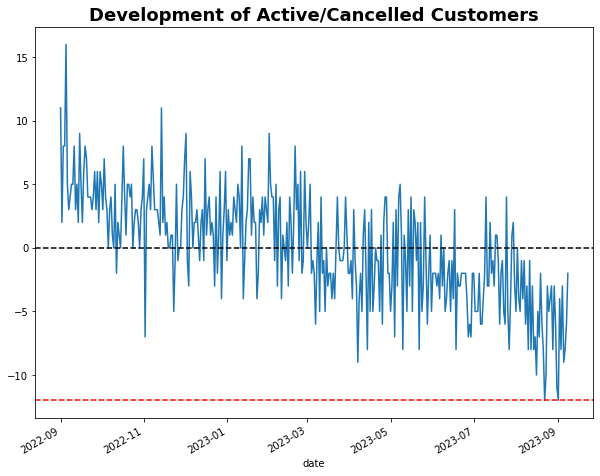

In [25]:
#new customers/subscriptions
sub_dv=df.groupby(['created_date'])['customer_id'].count().reset_index()
sub_dv=sub_dv.rename(columns={'created_date':'date','customer_id':'numb_new_customer'})

#customers/subscriptions lost/cancelled
sub_loss=df.groupby(['canceled_date'])['customer_id'].count().reset_index()
sub_loss=sub_loss.rename(columns={'canceled_date':'date','customer_id':'numb_lost_customer'})

#merging the two dataframes
df_dev=pd.merge(sub_dv,sub_loss,how='left',on='date').fillna(0)
df_dev['numb_lost_customer']=df_dev['numb_lost_customer'].astype('int')
df_dev['development']=df_dev['numb_new_customer']-df_dev['numb_lost_customer']
df_dev.set_index('date',inplace=True)

#creating a linegraph based on timestamps and number of gained/lost customers
plt.figure(figsize=(10,8))
df_dev['development'].plot()
plt.axhline(0,ls='--',color='black')
plt.axhline(df_dev['development'].min(),ls='--',color='red')
plt.title('Development of Active/Cancelled Customers',size=18,fontweight='bold')
#we can see that the data is unliekly to be stationary and we can see a negative trend
#around July 2023, the company had each month more negative subscriptions=> lost customers

In [12]:
#here, we check if the data set contains any duplicated values, and if that is the case, how many instances do we have
print('Number of instances that are duplicated: {}'.format(len(df[df['customer_id'].duplicated()==True]['customer_id'])))
df[df['customer_id'].duplicated()==True]['customer_id'].head()

Number of instances that are duplicated: 192


62 154809306
116 154904040
170 136108848
215 151154171
471 157663870
Name: customer_id, dtype: int64

In [13]:
returned_df_draft=df[(df['customer_id'].duplicated()==True)]
max_date=returned_df_draft.groupby('customer_id')['created_date'].max()
returning_df=pd.merge(returned_df_draft,max_date,how='left',on='customer_id').rename(columns={'created_date_y':'max_date',
                                                                                     'created_date_x':'created_date'})
dup_id=returned_df_draft['customer_id'].to_list()

In [14]:
returned_df=df[(df['customer_id'].duplicated()==True)]
dup_id=returned_df['customer_id'].to_list()
return_df=df[df['customer_id'].isin(dup_id)].sort_values('customer_id', ascending=True)
return_df.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,days_passed_since_cancellation,subscription_status
703,116060198,2022-12-13,2023-03-20,39,month,Yes,97,1
1820,116060198,2023-04-24,2023-04-24,39,month,Yes,0,0
2052,119436804,2023-05-21,2023-05-21,39,month,Yes,0,0
23,119436804,2022-09-03,2023-04-10,39,month,Yes,219,1
503,120738319,2022-11-14,2023-04-03,39,month,Yes,140,1


In [15]:
#here, we get the difference in days between the first cancellation and second signing date
min_can=return_df.groupby('customer_id')[['canceled_date']].min()
max_cr=return_df.groupby('customer_id')[['created_date']].max()
df_max_min=pd.merge(min_can,max_cr,on='customer_id',how='left').rename(columns={'canceled_date':'first_subscription_cancelation',
                                                                                'created_date':'new_subscription_date'})
df_max_min['days_to_new_subscription']=(df_max_min['new_subscription_date']-df_max_min['first_subscription_cancelation']).dt.days
df_max_min=df_max_min.reset_index()
df_max_min.head()

,customer_id,first_subscription_cancelation,new_subscription_date,days_to_new_subscription
0,116060198,2023-03-20,2023-04-24,35
1,119436804,2023-04-10,2023-05-21,41
2,120738319,2023-04-03,2023-05-18,45
3,121253113,2022-09-23,2023-08-14,325
4,121571816,2023-03-26,2023-04-08,13


Most Frequent Days of Returning 
 
 days_to_new_subscription
1     10
4      7
2      6
5      5
0      5
18     4
15     4
6      4
63     4
45     3
Name: customer_id, dtype: int64


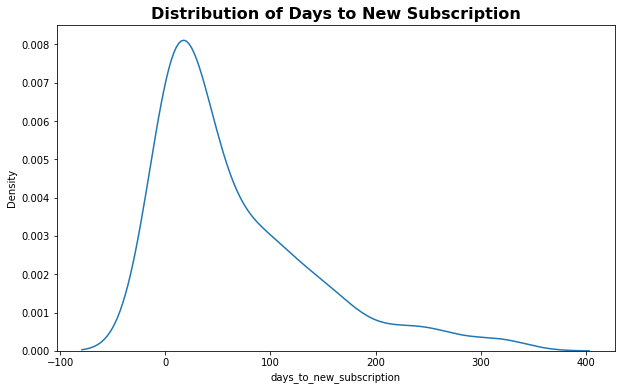

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_max_min['days_to_new_subscription'])
plt.title('Distribution of Days to New Subscription',size=16, fontweight='bold')
print('Most Frequent Days of Returning','\n','\n',df_max_min.reset_index().groupby('days_to_new_subscription')['customer_id'].count(
).sort_values(ascending=False).head(10))
to

In [17]:
#combing the two dataframes, to get the difference between returned and not returned
df_surv=pd.merge(df,df_max_min, how='left', on='customer_id')
df_surv=df_surv[['customer_id','created_date','canceled_date','subscription_cost',
                 'subscription_interval','was_subscription_paid','days_passed_since_cancellation','subscription_status',
                 'days_to_new_subscription']]
df_surv['days_to_new_subscription']=df_surv['days_to_new_subscription'].fillna(0).astype(int)
df_surv['return_status']=np.where(df_surv['days_to_new_subscription'] > 0,1,0)
df_surv.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,days_passed_since_cancellation,subscription_status,days_to_new_subscription,return_status
0,154536156,2022-09-01,2022-09-01,39,month,Yes,0,0,0,0
1,149713408,2022-09-01,2022-09-02,39,month,No,1,1,0,0
2,153756284,2022-09-01,2022-09-02,39,month,No,1,1,0,0
3,121253113,2022-09-01,2022-09-23,39,month,Yes,22,1,325,1
4,154467210,2022-09-01,2023-06-29,39,month,Yes,301,1,0,0


## Survival Analysis

I will perform a survival analysis to determine the probability of resigning based on the days after cancellation. To do so, I will use the Kaplan Meier Estimator.
### Kaplan Meier Estimator
It allows us to estimate the probability of a particular event. I will use the columns "days_to_new_subscription" and "return_status" to accomplish that.

In [18]:
#setting up the model and displaying the output in a table
from lifelines import KaplanMeierFitter
model=KaplanMeierFitter()
model.fit(durations=df_surv['days_to_new_subscription'],event_observed=df_surv['return_status'])
model.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
-1.0,2,0,2,3069,3069
0.0,2702,0,2702,0,3067
1.0,20,20,0,0,365
2.0,12,12,0,0,345
3.0,7,7,0,0,333


Text(0.5, 0, 'Days')

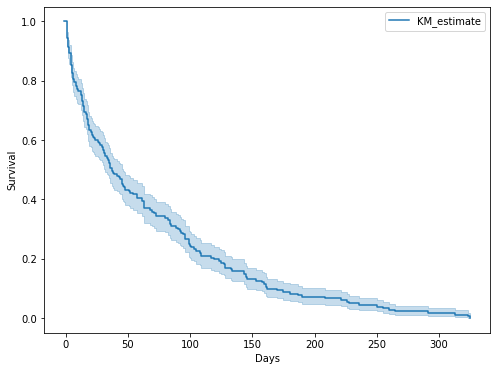

In [19]:
#Visualizing the survival rate
plt.figure(figsize=(8,6))
model.plot()
plt.ylabel('Survival')
plt.xlabel('Days')

Here, we can see the graph for the survival analysis; in the next step, I will create a def-function which will allow us to get the probability of survival based on different daily inputs.

In [20]:
#all possible day-values, where we can get the probability for
model.event_table.index.to_list()

[-1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 41.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 51.0,
 52.0,
 54.0,
 57.0,
 61.0,
 63.0,
 68.0,
 69.0,
 71.0,
 73.0,
 80.0,
 82.0,
 84.0,
 85.0,
 89.0,
 90.0,
 92.0,
 93.0,
 94.0,
 96.0,
 99.0,
 100.0,
 101.0,
 103.0,
 105.0,
 108.0,
 109.0,
 117.0,
 119.0,
 123.0,
 125.0,
 127.0,
 128.0,
 133.0,
 134.0,
 143.0,
 145.0,
 146.0,
 153.0,
 158.0,
 159.0,
 161.0,
 162.0,
 170.0,
 175.0,
 180.0,
 187.0,
 190.0,
 208.0,
 221.0,
 226.0,
 228.0,
 236.0,
 250.0,
 255.0,
 260.0,
 265.0,
 291.0,
 313.0,
 323.0,
 325.0]

In [21]:
#here I set up the draft for the def-function
value_table=model.event_table.reset_index()
output=value_table[value_table['event_at']==int(input('How many days have passed since cancellation?'))]
surv_prob=round(1*(1-output['observed']/output['at_risk']),4)
print('Probability of returning after {} day after the cancellation: '.format(output.iloc[0,0]), 
      surv_prob.reset_index().rename(columns={0:''}).iloc[:,1])

How many days have passed since cancellation? 24
Probability of returning after 24.0 day after the cancellation:  0    0.991
Name: , dtype: float64


In [22]:
#the pickle file contains the model and can be implemented wherever we want it to
import joblib

joblib.dump(model,'Survival_Analysis_Subscription.pkl')

['Survival_Analysis_Subscription.pkl']

In [23]:
#the def-funct to predict the propability of survival based on the 
def survival_probability(x):
    value_table=model.event_table.reset_index()
    output=value_table[value_table['event_at']==x]
    surv_prob=round(1*(1-output['observed']/output['at_risk']),4)
    print('Probability of returning after {} day after the cancellation: '.format(output.iloc[0,0]), 
    surv_prob.reset_index().rename(columns={0:''}).iloc[:,1])

In [24]:
survival_probability(input('How many days have passed since cancellation?'))

Probability of returning after 24.0 day after the cancellation:  0    0.991
Name: , dtype: float64


## Conclusion

Throughout the project, I created a model to predict the probability of customers returning who have already left.